Importando as Bibliotecas

In [1]:
import pandas as pd
import ipeadatapy as ip
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Lendo bases de dados

In [2]:
exportacoes = ip.timeseries('FUNCEX12_XPT12') # base de dados do índice de preços das exportações

In [3]:
PIB = ip.timeseries('BM12_PIB12') # base de dados do PIB por mês

In [4]:
exportacoes.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (-)
DATE,,,,,,
1977-01-01,FUNCEX12_XPT12,1977-01-01T00:00:00-02:00,1,1,1977,51.48
1977-02-01,FUNCEX12_XPT12,1977-02-01T00:00:00-02:00,1,2,1977,51.61
1977-03-01,FUNCEX12_XPT12,1977-03-01T00:00:00-03:00,1,3,1977,55.92
1977-04-01,FUNCEX12_XPT12,1977-04-01T00:00:00-03:00,1,4,1977,57.57
1977-05-01,FUNCEX12_XPT12,1977-05-01T00:00:00-03:00,1,5,1977,59.49


In [5]:
PIB.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$)
DATE,,,,,,
1990-01-01,BM12_PIB12,1990-01-01T00:00:00-02:00,1,1,1990,0.2
1990-02-01,BM12_PIB12,1990-02-01T00:00:00-02:00,1,2,1990,0.4
1990-03-01,BM12_PIB12,1990-03-01T00:00:00-03:00,1,3,1990,0.8
1990-04-01,BM12_PIB12,1990-04-01T00:00:00-03:00,1,4,1990,0.7
1990-05-01,BM12_PIB12,1990-05-01T00:00:00-03:00,1,5,1990,0.8


Tratamento dos dados

In [6]:
# resetando índice dos DataFrames
PIB = PIB.reset_index() 
exportacoes = exportacoes.reset_index()

Criando colunas de ano e mês

In [7]:
# criando colunas de ano e mês
PIB['AnoMes'] = PIB['DATE'].dt.to_period('M')
exportacoes['AnoMes'] = exportacoes['DATE'].dt.to_period('M')

Retirando colunas que não serão usadas na regressão

In [8]:
# retirando colunas que não vão ser usadas na regressão
PIB = PIB.drop(['DATE', 'CODE', 'RAW DATE', 'DAY', 'MONTH', 'YEAR'], axis = 1)
exportacoes = exportacoes.drop(['DATE', 'CODE', 'RAW DATE', 'DAY', 'MONTH', 'YEAR'], axis = 1)

Juntando os dados no mesmo DataFrame

In [9]:
# juntando os dois DataFrames
exportacoes_PIB = exportacoes.merge(PIB,
                 how= 'left',
                 on= 'AnoMes')

Filtrando dados a partir de 2015

In [10]:
# filtrando os dados a partir de 2015
exportacoes_PIB = exportacoes_PIB[exportacoes_PIB['AnoMes'] > '2014-12']

Ordenando e Renomeando colunas 

In [11]:
# reordenando colunas
exportacoes_PIB = exportacoes_PIB[['AnoMes', 'VALUE (-)', 'VALUE (R$)']]

In [12]:
# renomeando as colunas
exportacoes_PIB = exportacoes_PIB.rename(columns = {'VALUE (-)': 'Exportações (-)', 'VALUE (R$)': 'PIB (R$)'})

In [13]:
exportacoes_PIB.head()

,AnoMes,Exportações (-),PIB (R$)
456,2015-01,101.79,472913.9
457,2015-02,98.60,460156.7
458,2015-03,97.09,501752.2
459,2015-04,93.60,486614.6
460,2015-05,93.11,483239.7


Fazendo modelo de regressão

In [14]:
# transformando os valores de exportações em array
valor_exportacao = exportacoes_PIB['Exportações (-)'].to_numpy() 

In [15]:
# transformando o array em 2D
valor_exportacao = valor_exportacao.reshape(-1,1)

In [16]:
# criando o modelo de regressão linear simples
regressao = LinearRegression().fit(valor_exportacao, exportacoes_PIB['PIB (R$)'])

In [17]:
# calcula os dados usados para plotar o gráfico de linha
linha_regressao = regressao.predict(valor_exportacao) 

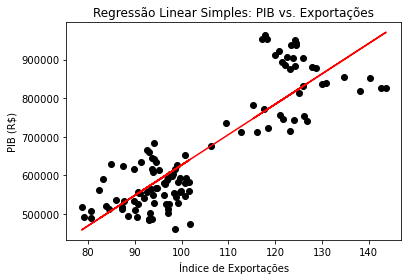

In [18]:
# plotando o gráfico
plt.scatter(exportacoes_PIB['Exportações (-)'], exportacoes_PIB['PIB (R$)'], color = 'black')
plt.plot(exportacoes_PIB['Exportações (-)'], linha_regressao, color = 'red')
plt.xlabel('Índice de Exportações')
plt.ylabel('PIB (R$)')
plt.title('Regressão Linear Simples: PIB vs. Exportações')
plt.show()